### 목표
- 선형회귀 이론에 대해서 알아보자
- 선형회귀모델의 원리를 직접 구현
- 공부시간에 따른 성적데이터를 예측

In [59]:
# 기본 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
# 공부시간에 따른 성적데이터 DataFrame 만들기
data = pd.DataFrame({'시간':[2,4,8,9], '성적':[20,40,80,90]},
            index = ['지원','대길','정훈','승혁'])
data

,시간,성적
지원,2,20
대길,4,40
정훈,8,80
승혁,9,90


### 선형회귀모델 실습
01. LinearRegression
    - 단순 수학공식(MSE)을 활용하여 직선을 찾아나가는 방법
    - 단순선형회귀

In [61]:
# 모델 불러오기
from sklearn.linear_model import LinearRegression

In [62]:
# 모델 객체생성
linear_model = LinearRegression()

In [63]:
# 모델학습
# 모델명.fit(시간(x), 성적(y))  ※ 시간(문제) 데이터는 반드시 2차원!!!
linear_model.fit(data[['시간']], data['성적'])

LinearRegression()

In [64]:
# 모델 예측
# 모델명.predict(문제) -> 문제니까 2차원으로 넣어줘야함!
# 7시간 공부했을때 성적은?
linear_model.predict([[7]])

C:\Users\SMHRD\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([70.])

In [65]:
# 모델이 예측한 가중치(w), 절편(b) 확인
# y = wx + b   -> 우리가 예상한 그래프 y = 10x + 0
print("가중치(w):", linear_model.coef_)
print("절편(b):", linear_model.intercept_)
# 절편값이 부동소수점(뒤에있는 숫자만큼 소수점을 앞으로 이동 해석)
# 0.0000000000000007... -> 거의 0이라고 생각

# 모델의 예측직선 : y= 10x + 0

가중치(w): [10.]
절편(b): 7.105427357601002e-15


### 경사하강법
- 선형모델 MSE가 최소가 되는 w(가중치), b(절편)을 찾는 받법
- 찾고자 하는 값에 변화에 따른 비용함수(cpst)값의 변화 그래프를 출력
    - 비용함수: 원래의 값과 가장 오차가 작은 가설함수를 도출하기 위해 사용하는 함수

- 가중치 변화에 따른 MSE 변화 그래프 확인

In [66]:
# 가설함수 설정 (예측값)
def h(w,x):
    return w * x + 0

In [67]:
# 비용함수 (MSE)
# ((예측값 - 실제값) **(제곱) 2).mean
# def cost (예측값, 실제값, 가중치)
def cost (data, target, weight):  # data: 예측할 x 값
    y_pre = h(weight, data) # 이 수식에 의해서 예측값이 나오게 된다
    mse = ((y_pre - target)**2).mean()
    return mse

In [68]:
# 예측한 가중치 w가 10일때 MSE 값은? > 0
# y = 10*x + 0
cost(data['시간'],data['성적'],10)

0.0

In [69]:
# 예측한 가중치가 5일 경우
cost(data['시간'],data['성적'],5)

1031.25

In [70]:
# 예측한 가중치가 15일 경우
cost(data['시간'],data['성적'],15)

1031.25

In [71]:
# 예측한 가중치가 3일 경우
cost(data['시간'],data['성적'],3)

2021.25

In [72]:
# w값에 따른 mse 변화율 그래프 그려보기
w_arr = range(-10,31) # -10~30
# 가중치 변화에 따른 mse 값을 리스트에 저장
cost_list = []
for w in w_arr:
    c = cost(data['시간'],data['성적'],w)
    cost_list.append(c)
cost_list

[16500.0,
 14891.25,
 13365.0,
 11921.25,
 10560.0,
 9281.25,
 8085.0,
 6971.25,
 5940.0,
 4991.25,
 4125.0,
 3341.25,
 2640.0,
 2021.25,
 1485.0,
 1031.25,
 660.0,
 371.25,
 165.0,
 41.25,
 0.0,
 41.25,
 165.0,
 371.25,
 660.0,
 1031.25,
 1485.0,
 2021.25,
 2640.0,
 3341.25,
 4125.0,
 4991.25,
 5940.0,
 6971.25,
 8085.0,
 9281.25,
 10560.0,
 11921.25,
 13365.0,
 14891.25,
 16500.0]

Text(0, 0.5, 'mse')

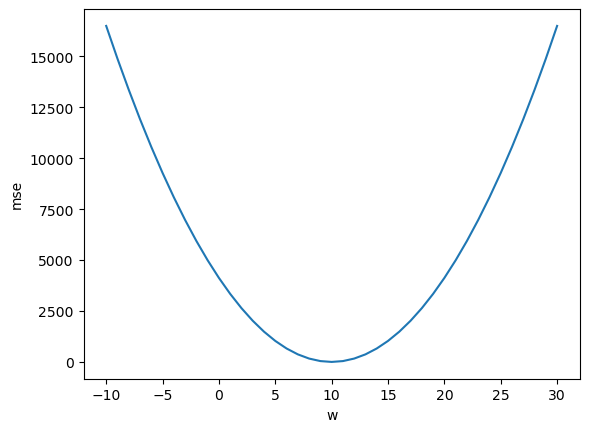

In [73]:
# 그래프 출력
plt.plot(w_arr, cost_list)
plt.xlabel('w')
plt.ylabel('mse')

### SGDRegressor
- Stochastic Gradient Desecent  (확률적 경사하강법)
- 사이킷런에서 구성해놓은 경사하강법을 활용한 선형회귀모델
- 경사하강법을 이용하는 모델

In [74]:
# 모델 불러오기
from sklearn.linear_model import SGDRegressor

In [75]:
# 모델 객체생성
sgd_model = SGDRegressor(eta0=  0.001, # learning_rate: 학습률
                        max_iter=500, # 반복횟수, 업데이트 횟수
                        verbose = 1) # 진행상황 출력

In [76]:
# 모델학습
sgd_model.fit(data[['시간']], data['성적'])

-- Epoch 1
Norm: 1.43, NNZs: 1, Bias: 0.189252, T: 4, Avg. loss: 1872.555022
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.27, NNZs: 1, Bias: 0.307511, T: 8, Avg. loss: 1413.526247
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 2.96, NNZs: 1, Bias: 0.403352, T: 12, Avg. loss: 1152.164802
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 3.53, NNZs: 1, Bias: 0.483061, T: 16, Avg. loss: 954.414588
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 4.03, NNZs: 1, Bias: 0.552006, T: 20, Avg. loss: 804.847387
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 4.47, NNZs: 1, Bias: 0.612469, T: 24, Avg. loss: 683.196666
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 4.86, NNZs: 1, Bias: 0.666153, T: 28, Avg. loss: 585.549161
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 5.20, NNZs: 1, Bias: 0.714294, T: 32, Avg. loss: 504.147614
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 5.52, NNZs: 1, Bias: 0.757552, T: 36, Avg. loss: 436.959700
Total training time: 0.00 

SGDRegressor(eta0=0.001, max_iter=500, verbose=1)

In [77]:
sgd_model.predict([[7]])

C:\Users\SMHRD\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  warnings.warn(


array([69.88314706])

In [78]:
# 가중치 절편 확인
print("w(가중치): ", sgd_model.coef_)
print("b(절편):", sgd_model.intercept_)
# 예측직선: y = 9x + 1

w(가중치):  [9.79441483]
b(절편): [1.32224327]


### 호주 집가격 예측
- 회귀모델

In [79]:
# 데이터 로드 읽어오기~
house_data = pd.read_csv('data/melb_data.csv')
house_data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [80]:
# 요약정보 확인
house_data.info()
# 20개의 특성, 1개의 정답(Price)
# 결측치 유뮤 확인 -> 있음
# Dtype -> 숫자형태의 데이터만 학습 가능!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [81]:
# 모델링을 위한 특성 선택 -> Price 정답데이터와 상관관계가 높은 컬럼 5개 선택
house_data.corr(numeric_only=True)

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.496634,0.294203,0.055303,0.944190,0.592934,0.408483,0.025678,0.124127,-0.065413,0.015948,0.100771,-0.081530
Price,0.496634,1.000000,-0.162522,0.107867,0.475951,0.467038,0.238979,0.037507,0.090981,-0.323617,-0.212934,0.203656,-0.042153
Distance,0.294203,-0.162522,1.000000,0.431514,0.295927,0.127155,0.262994,0.025004,0.099481,0.246379,-0.130723,0.239425,-0.054910
Postcode,0.055303,0.107867,0.431514,1.000000,0.060584,0.113664,0.050289,0.024558,0.055475,0.032863,-0.406104,0.445357,0.062304
Bedroom2,0.944190,0.475951,0.295927,0.060584,1.000000,0.584685,0.405325,0.025646,0.122319,-0.053319,0.015925,0.102238,-0.081350
Bathroom,0.592934,0.467038,0.127155,0.113664,0.584685,1.000000,0.322246,0.037130,0.111933,0.152702,-0.070594,0.118971,-0.052201
Car,0.408483,0.238979,0.262994,0.050289,0.405325,0.322246,1.000000,0.026770,0.096101,0.104515,-0.001963,0.063395,-0.024295
Landsize,0.025678,0.037507,0.025004,0.024558,0.025646,0.037130,0.026770,1.000000,0.500485,0.036451,0.009695,0.010833,-0.006854
BuildingArea,0.124127,0.090981,0.099481,0.055475,0.122319,0.111933,0.096101,0.500485,1.000000,0.019665,0.043420,-0.023810,-0.028840
YearBuilt,-0.065413,-0.323617,0.246379,0.032863,-0.053319,0.152702,0.104515,0.036451,0.019665,1.000000,0.060445,-0.003470,0.006361


In [82]:
# 특성선택 5개
feature_name = ['Rooms', 'Bedroom2','Bathroom','Lattitude', 'Distance']
# Distance : 시내로부터 떨어진 거리
# Latittude: 위도(위치)

In [101]:
# 문제
X = house_data[feature_name]
# 정답
y = house_data['Price']

       Rooms  Bedroom2
0          2       2.0
1          2       2.0
2          3       3.0
3          3       3.0
4          4       3.0
...      ...       ...
13575      4       4.0
13576      3       3.0
13577      3       3.0
13578      4       4.0
13579      4       4.0

[13580 rows x 2 columns]


In [84]:
# 훈련용, 평가용 데이터로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 22)

In [85]:
# 크기확인
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(9506, 5) (9506,)
(4074, 5) (4074,)


In [86]:
# 모델 생성
# 단순 mse 활용 선형회귀모델 - house_linear_model
# 경사하강법을 활용한 선형회귀모델 ( 하이퍼파라미터 조절 X) -> house_sgd_model
house_linear_model = LinearRegression()
house_sgd_model = SGDRegressor()

In [87]:
# 학습
house_linear_model.fit(X_train,y_train)
house_sgd_model.fit(X_train, y_train)

SGDRegressor()

In [88]:
# 평가지표 (mse)
from sklearn.metrics import mean_squared_error # 평균제곱오차
# metrics: 평가지표 모음

In [89]:
# 예측
linear_pre = house_linear_model.predict(X_test)
sgd_pre = house_sgd_model.predict(X_test)

In [90]:
# 평가
# mean-squared_error(실제답, 예측답)
print('linear_mse: ', mean_squared_error(y_test, linear_pre))

linear_mse:  230460176519.2322


In [91]:
# sd_model의 평가 및 mse 확인

In [95]:
print('sgd_mse: 'mean_squared_error(y_test, sgd_pre))
# 단순 linear 모델보다 오차가 큰것을 확인
# sgd모델은 경사하강법을 활용 -> 초기 값을 랜덤으로 설정
# 평가 결과가 달라질 수 있음!

620372895530.9141


In [97]:
# 오차를 제곱하다 보니 결과도 제곱 -> 단위문제
# 해결하기 위해서 오차에 루트
# RMSE
print('linear_mse: ', mean_squared_error(y_test, linear_pre)**0.5)
print(mean_squared_error(y_test, sgd_pre)**0.5)

linear_mse:  480062.67978174705
787637.5407069639


In [98]:
# r2 score
# 오차로만 성능을 파악하기에는 비교대상이 XX
# 실제데이터에서 오차와 예측데이터에서 오차를 비교하여
# 차이를 확인 -> 1에 가까울수록 잘예측했다고 판단

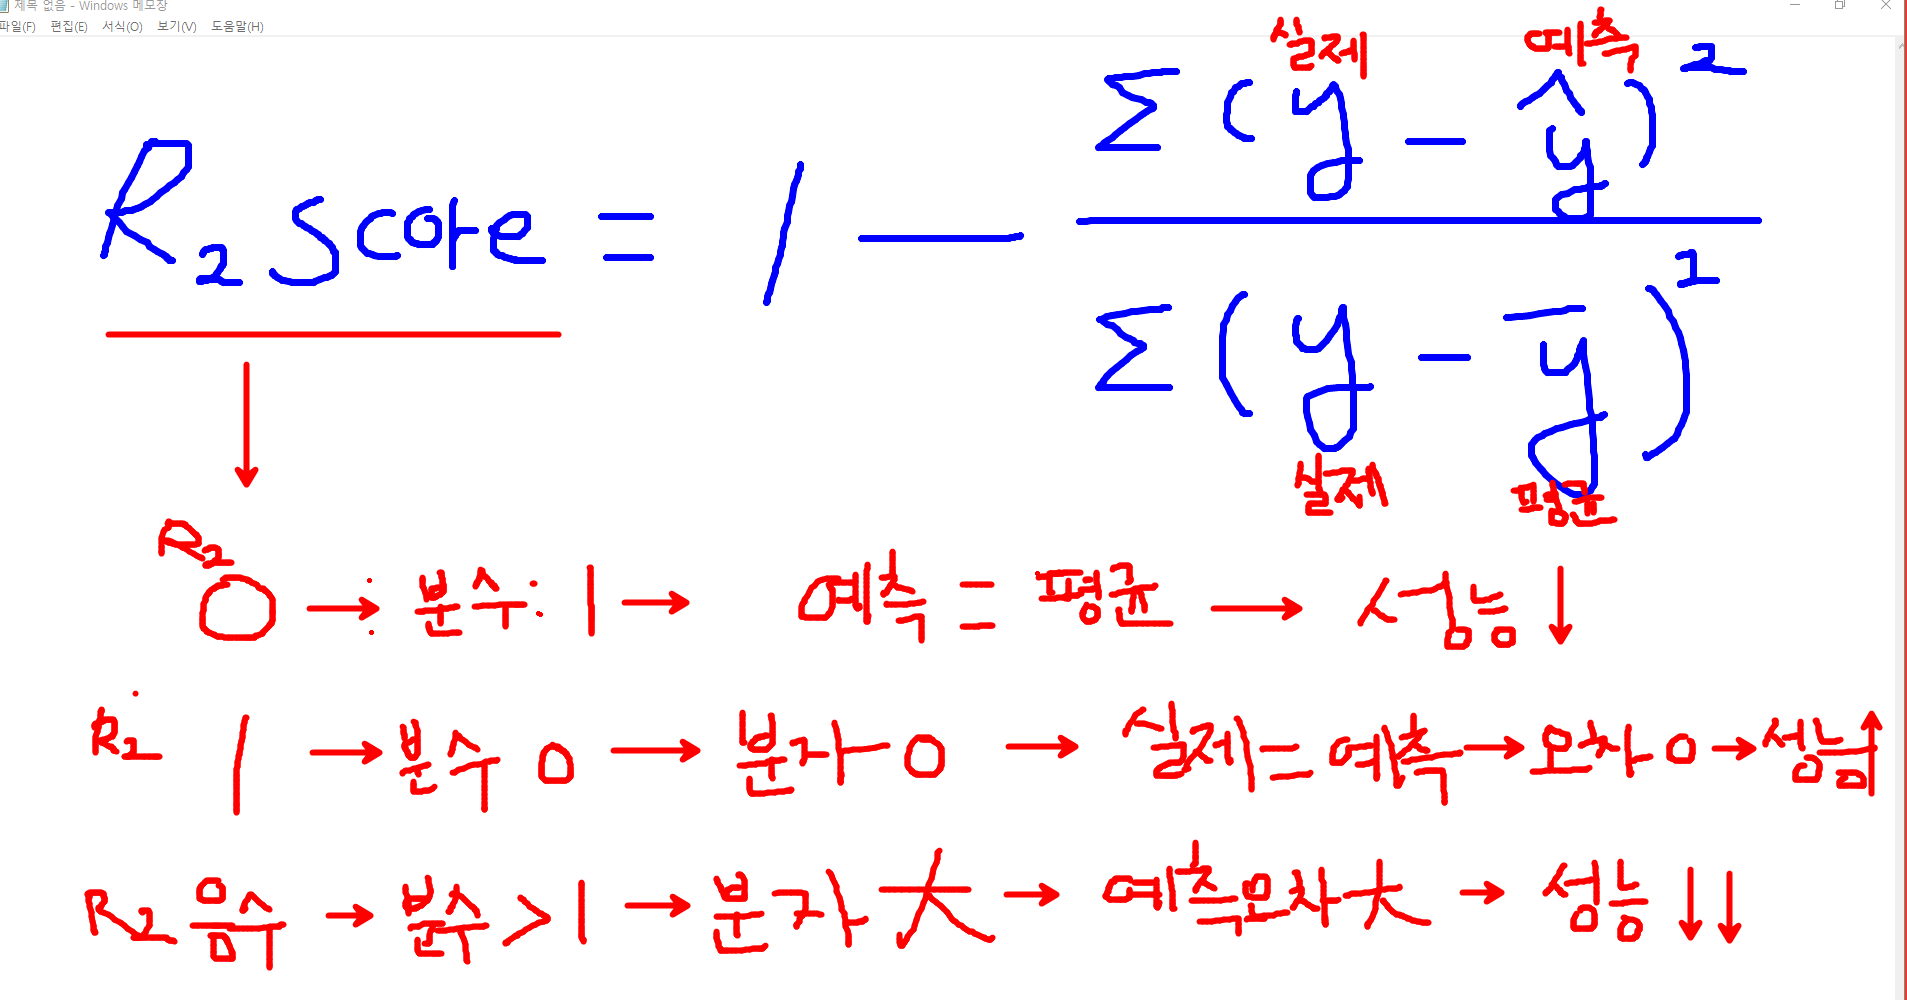

### 회귀모델의 평가지표
- MSE(MeanSquaredError 평균제곱오차)
    - 실제데이터와 예측데이터의 차이 제곱 -> 평균
- RMSE(RootMeanSquaredError)
    - MSE에 루트를 씌워줌으로써 단위문제를 해결
- MAE(MeanAbsoluteError)
    - 실제데이터와 예측데이터의 차이 절대값씌워서 평균 구한것 (부호)
- r2 score
    - 위 3개의 지표들은 오차로 판단하기 때문에 공통적인 평가방법이 아니더라, 정규화된 방법으로 회귀모델을 평가하기 위하여 나온 평가지표
    - 실제값과 예측값의 분산비교
    - 실제데이터에서의 오차와 예측데이터에서의 오차 비교
    - 1에 가까울수록 잘 예측했다고 판별

In [102]:
# r2 score 구해보기
print("Linear score: ", house_linear_model.score(X_test, y_test))
print('SGD score: ', house_sgd_model.score(X_test,y_test))

Linear score:  0.45209629408691876
SGD score:  -0.4748952016056931


### 스케일링 적용
- 선형모델 각 특성에 스케일에 영향을 받는 모델(오차계산 -> 거리계산)
- 경사하강법 적용시 학습의 안정성을 위해서 스케일링 진행

In [103]:
# 도구 불러오기
from sklearn.preprocessing import StandardScaler

In [104]:
# 스케일러 생섣
std_scaler = StandardScaler()

In [106]:
# 스케일러 -> X_train 에 대해 학습 -> 변환
X_train_scale = std_scaler.fit_transform(X_train)
X_test_scale = std_scaler.transform(X_test)

In [124]:
# 다시 모델 학습 및 평가
# linear_model2
# sgd_model2
# 평가 (r2 score 로 평가)
linear_model2 = LinearRegression()
linear_model2.fit(X_train_scale, y_train)
sgd_model2 = SGDRegressor(eta0 = 0.001)
sgd_model2.fit(X_train_scale, y_train)
print("스케일링 진행한 linear score: ", linear_model2.score(X_test_scale, y_test))
print("스케일링 진행 sgd score: ", sgd_model2.score(X_test_scale, y_test))

스케일링 진행한 linear score:  0.45209629408691887
스케일링 진행 sgd score:  0.4516882523491974
